In [1]:
! pip install transformers
! pip install torch

You should consider upgrading via the 'c:\users\alex\appdata\local\programs\pythoncodingpack\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\alex\appdata\local\programs\pythoncodingpack\python.exe -m pip install --upgrade pip' command.


# load bert and tokenizer

In [1]:
from transformers import BertTokenizer, BertModel
import torch

model_name = 'bert-base-uncased'  # Example: 'bert-base-uncased' or 'bert-large-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)
model.eval()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

# tokenize job titles

In [7]:
import pandas as pd

tokenized_titles = [tokenizer.encode(title, add_special_tokens=True) for title in df["job_title"]]

# pad tokenized titles to equal length

In [8]:
max_length = max(len(tokens) for tokens in tokenized_titles)
padded_titles = [tokens + [0] * (max_length - len(tokens)) for tokens in tokenized_titles]

# convert titles to pytorch sensors

In [9]:
input_ids = torch.tensor(padded_titles)

# generate BERT embeddings

In [10]:
! pip install pickle
import pickle

file_path = "bert_embeddings.pkl"

with torch.no_grad():
    outputs = model(input_ids)
    embeddings = outputs[0]  # BERT embeddings are obtained from the first element of the outputs

with open(file_path, 'wb') as file:
    pickle.dump(embeddings, file)

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
You should consider upgrading via the 'c:\users\alex\appdata\local\programs\pythoncodingpack\python.exe -m pip install --upgrade pip' command.


test
test
test


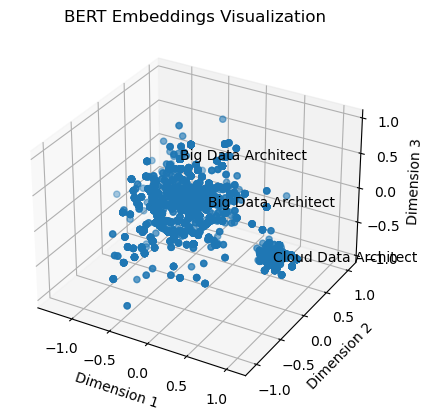

In [32]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


with open(file_path, 'rb') as file:
    embeddings = pickle.load(file)


import torch
import matplotlib.pyplot as plt

# Assuming you have the embeddings tensor stored in the 'embeddings' variable
# and a list of job titles stored in the 'job_titles' variable

# Convert the embeddings tensor to a numpy array
embeddings_np = embeddings.numpy()

# Extract the x, y, and z coordinates from the embeddings
x = embeddings_np[:, :, 0].flatten()
y = embeddings_np[:, :, 1].flatten()
z = embeddings_np[:, :, 2].flatten()

# Create a 3D scatter plot of the embeddings
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z)

# Add labels to the data points
for i, title in enumerate(df["job_title"]):
    if title not in ["Cloud Data Architect", 'Big Data Architect']:
        continue
    ax.text(x[i], y[i], z[i], title)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

plt.title('BERT Embeddings Visualization')
plt.show()